Question 1

Question 2

In [62]:
import numpy as np 
import sklearn
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

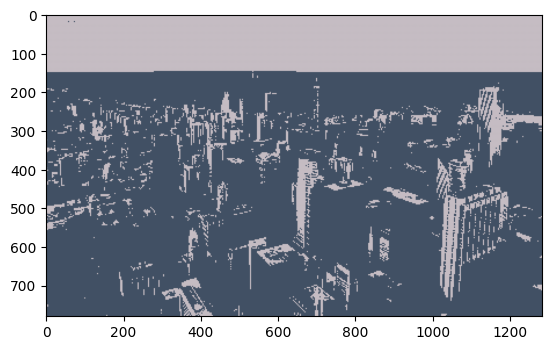

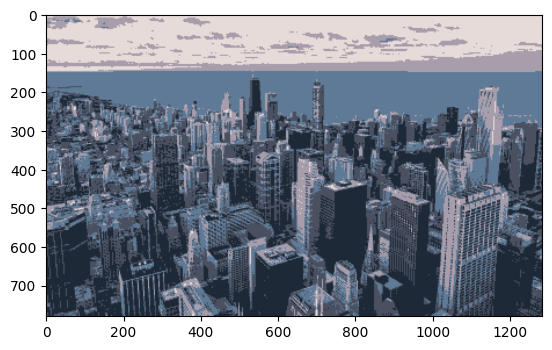

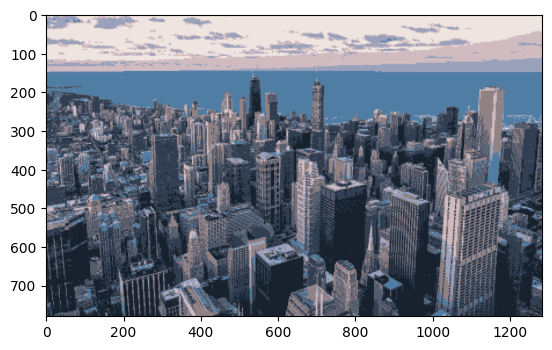

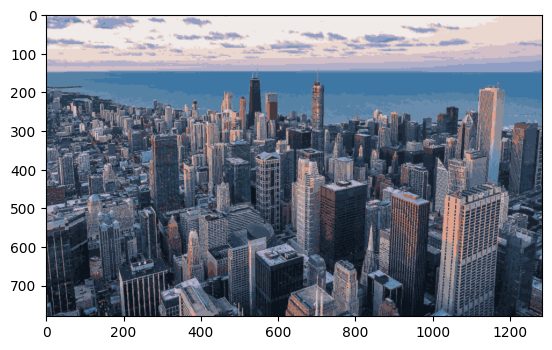

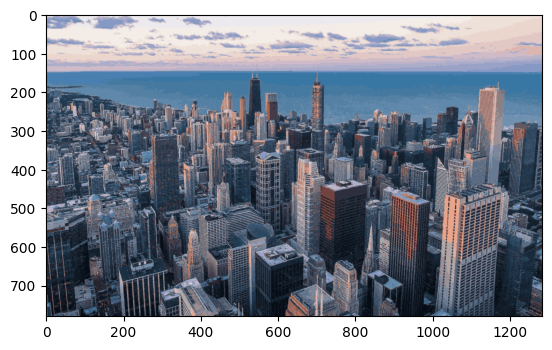

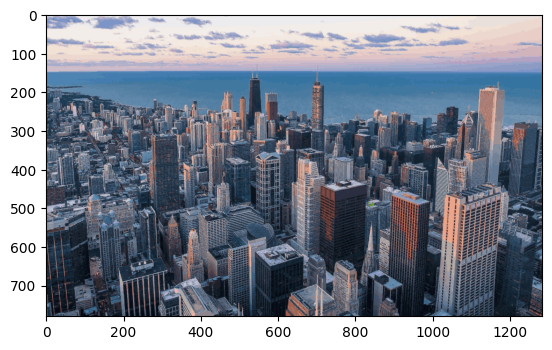

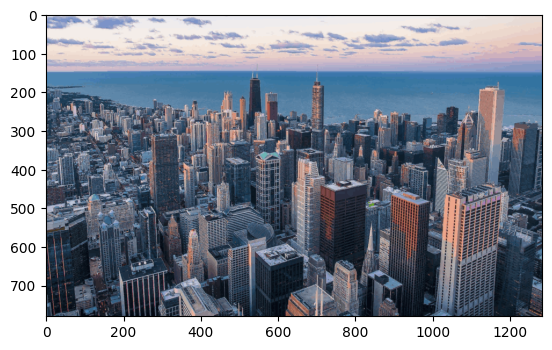

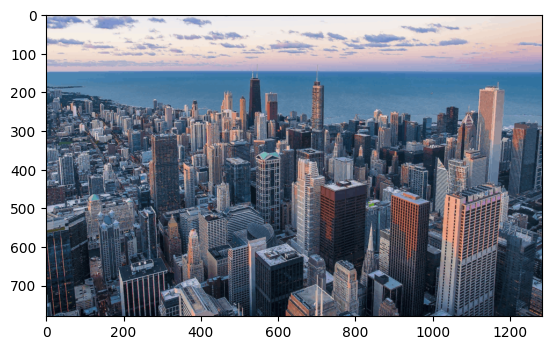

In [207]:
import sklearn.cluster

def find_chunk(y,x, img_x):
    return (y//3)*(img_x//3) + x//3

def find_vector_index(j,i):
    return (j)*(3) + i 

def reconstruct_index_to_pixel(vector, i, pixel):
    for j in range(len(pixel)):
        pixel[j] = vector[i+j].astype(np.float32)
        # pixel[j] = pixel[j] * 1.5
    
    return pixel

def flat_chunk(chunk):
    res = []
    for row in chunk:
        for pixel in row:
            for c in pixel:
                res.append(c.astype(np.float32))
    return res

k_list = [2, 5, 10, 50, 200, 500, 1000, 2000]
img = mpimg.imread('cityview.png') # colors between 0 and 1

# split image into 3 by 3 chunks
index_chunk_dict = {}
chunks = np.array([img[i:i+3, j:j+3] for i in range(0, img.shape[0], 3) for j in range(0, img.shape[1], 3) ])

# transform each chunk into a vector
matrix = np.array([flat_chunk(chunk) for chunk in chunks])

# apply k-means clustering
reconstructed_images = []
reconstructed_img = img.copy()

for k in k_list:
    # make numpy array of floats of size img
    reconstructed_img = img.copy()

    # make reconstructed it size of img
    centroids, label, inertia = sklearn.cluster.k_means(matrix, k)

    # reconstruct image
    for y in range(0, img.shape[0], 3):
        for x in range(0, img.shape[1], 3):
            chunk_index = find_chunk(y,x,img.shape[1])
            cluster_number = label[chunk_index]
            cluster_vector = centroids[cluster_number]
            reshaped_vector = cluster_vector.reshape(3, 3, 3)
            reconstructed_img[y:y+3, x:x+3] = reshaped_vector
           
    reconstructed_img = reconstructed_img.astype(np.float32)
    plt.imshow(reconstructed_img)
    plt.show()
    reconstructed_images.append(reconstructed_img.copy())
    

# for recon_img in reconstructed_images:
#     plt.imshow(recon_img)
#     plt.show()


Question 3

In [208]:
recon_errors = {}
k_list = [2, 5, 10, 50, 200, 500, 1000, 2000]
for i, recon_img in enumerate(reconstructed_images):
    e = (img - recon_img)**2
    k = k_list[i]
    recon_errors[k] = e.mean()

print('k , mean squared error')
for item in recon_errors.items():
    print(item, '\n') 

k , mean squared error
(2, np.float32(0.028688282)) 

(5, np.float32(0.012967229)) 

(10, np.float32(0.009763743)) 

(50, np.float32(0.0054318304)) 

(200, np.float32(0.0036244132)) 

(500, np.float32(0.0028152138)) 

(1000, np.float32(0.0023150286)) 

(2000, np.float32(0.0018827054)) 



Question 4

In [209]:

# need chunk array - 111280
# need label array - 111280
# need array centroids of size k * 27
# do we need img size? if so, does it count as a 2 numbers (x, y) or a number for each entry 1284 x 780

# total = k * 27 + 2 * 111280


# original size is 111,280 (chunks) elements of size 27
# new size is 111,280 (chunks) elements matched to one of k clusters of size 27
# before, each chunk had 27 unique numbers associated with it
# now, multiple chunks are matched to a single cluster vector of size 27 out of k clusters

# now, k * 27 + 111280 * 1 (now each chunk has a single cluter index associated with it, instead of 27. Each index is associated with a vector of 27 numbers)



compressed_sizes = {}
print("k : total numbers\n")
for k in k_list:
    compressed_sizes[k] = k*27 + 1 * 111280
    print(k, ':', k * 27 + 1 * 111280, '\n')

k : total numbers

2 : 111334 

5 : 111415 

10 : 111550 

50 : 112630 

200 : 116680 

500 : 124780 

1000 : 138280 

2000 : 165280 



Question 5

In [210]:
# Compression rate = compressed size / original size

original_size = 1284 * 780 * 3
print(original_size)
print("k : compression rate\n")
for k in k_list:
    print(k, ':', compressed_sizes[k] / original_size, '\n')

3004560
k : compression rate

2 : 0.03705500971856112 

5 : 0.037081968740847245 

10 : 0.037126900444657454 

50 : 0.037486354075139124 

200 : 0.038834305189445376 

500 : 0.041530207418057886 

1000 : 0.04602337779907873 

2000 : 0.05500971856112043 

